✅ Loaded OLD Kalicube graph from: link_graph_edges.csv
✅ Loaded NEW Kalicube graph from: updated_link_graph_edges.csv

📊 Network Statistics:
📈 OLD Kalicube Graph (from link_graph_edges.csv):
   Nodes: 1,841
   Edges: 122,066
   Density: 0.036035
   Avg in-degree: 66.30
   Avg out-degree: 66.30

📈 NEW Kalicube Graph (from updated_link_graph_edges.csv):
   Nodes: 1,842
   Edges: 122,116
   Density: 0.036011
   Avg in-degree: 66.30
   Avg out-degree: 66.30

🌐 WWW Graph (simulated for each iteration):
   Nodes: 10,000
   Edges per new node: 3
   Expected total edges: ~29,991
   Graph type: Scale-free (preferential attachment)
🔄 Starting 20 simulations...
✅ Loaded NEW Kalicube graph from: updated_link_graph_edges.csv

📊 Network Statistics:
📈 OLD Kalicube Graph (from link_graph_edges.csv):
   Nodes: 1,841
   Edges: 122,066
   Density: 0.036035
   Avg in-degree: 66.30
   Avg out-degree: 66.30

📈 NEW Kalicube Graph (from updated_link_graph_edges.csv):
   Nodes: 1,842
   Edges: 122,116
   Densi

C:\Users\Miroslav Mirchev\AppData\Local\Temp\ipykernel_19324\3158916257.py:359: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results_df['Total_Delta'], labels=['Total Delta'])


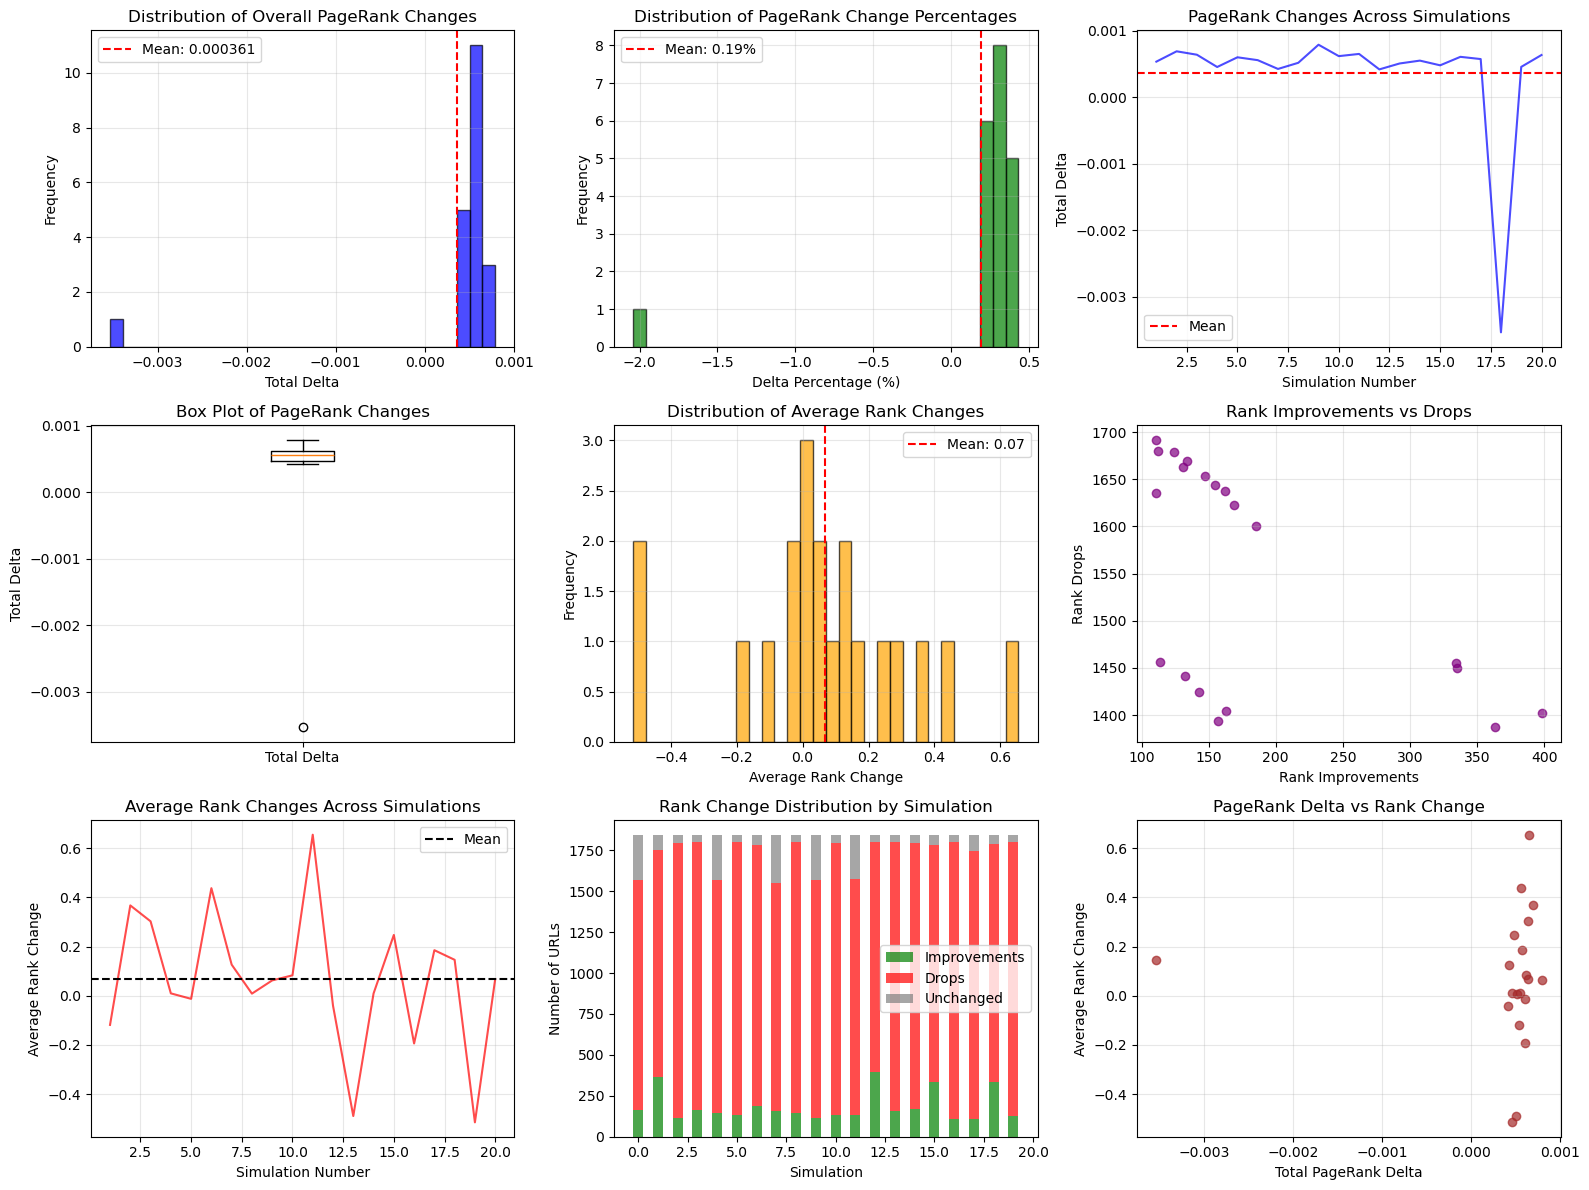

✅ Saved: url_statistics_across_simulations.csv
   Contains statistics for 1841 URLs across all simulations

🏆 Top 10 Most Consistent Rank Improvers (by mean rank change):
                                                                                                                                                                            URL  Rank_Change_mean  Rank_Change_std  PageRank_Delta_mean
                                                                                https://kalicube.com/learning-spaces/faq/seo-glossary/latest-from-in-seo-what-you-need-to-know/          -1643.45         2.543826             0.000149
                                                  https://kalicube.com/learning-spaces/faq/knowledge-panels/google-knowledge-panel-for-a-doctor-how-to-get-manage-and-optimise/          -1324.75       240.289929             0.000028
                                                https://kalicube.com/learning-spaces/faq/knowledge-panels/google-knowledge-panel-for-

In [5]:
# -*- coding: utf-8 -*-

import pandas as pd
import networkx as nx
import numpy as np
import random
import re
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns

# --- User Input for Graph Files ---
old_graph_filename = 'link_graph_edges.csv'
new_graph_filename = 'updated_link_graph_edges.csv'

# Number of simulations to run
NUM_SIMULATIONS = 20

# Connection range for WWW-Kalicube interconnections
MIN_CONNECTIONS = 5
MAX_CONNECTIONS = 50

# -----------------------------
# Step 1: Load Kalicube Graphs (only once)
# -----------------------------
try:
    old_link_df = pd.read_csv(old_graph_filename)
    kalicube_graph_old = nx.from_pandas_edgelist(
        old_link_df, source="FROM", target="TO", create_using=nx.DiGraph()
    )
    print(f"✅ Loaded OLD Kalicube graph from: {old_graph_filename}")
except FileNotFoundError:
    print(
        f"❌ Error: {old_graph_filename} not found. Please ensure the file is in the same directory as the script."
    )
    exit()

try:
    new_link_df = pd.read_csv(new_graph_filename)
    kalicube_graph_new = nx.from_pandas_edgelist(
        new_link_df, source="FROM", target="TO", create_using=nx.DiGraph()
    )
    print(f"✅ Loaded NEW Kalicube graph from: {new_graph_filename}")
except FileNotFoundError:
    print(
        f"❌ Error: {new_graph_filename} not found. Please ensure the file is in the same directory as the script."
    )
    exit()

# Store results from all simulations
all_results = []
all_comparison_dfs = []

# -----------------------------
# Print Basic Network Statistics
# -----------------------------
print("\n📊 Network Statistics:")
print("=" * 50)

# Kalicube OLD graph statistics
print(f"📈 OLD Kalicube Graph (from {old_graph_filename}):")
print(f"   Nodes: {kalicube_graph_old.number_of_nodes():,}")
print(f"   Edges: {kalicube_graph_old.number_of_edges():,}")
print(f"   Density: {nx.density(kalicube_graph_old):.6f}")
if kalicube_graph_old.number_of_nodes() > 0:
    print(f"   Avg in-degree: {sum(dict(kalicube_graph_old.in_degree()).values()) / kalicube_graph_old.number_of_nodes():.2f}")
    print(f"   Avg out-degree: {sum(dict(kalicube_graph_old.out_degree()).values()) / kalicube_graph_old.number_of_nodes():.2f}")

# Kalicube NEW graph statistics
print(f"\n📈 NEW Kalicube Graph (from {new_graph_filename}):")
print(f"   Nodes: {kalicube_graph_new.number_of_nodes():,}")
print(f"   Edges: {kalicube_graph_new.number_of_edges():,}")
print(f"   Density: {nx.density(kalicube_graph_new):.6f}")
if kalicube_graph_new.number_of_nodes() > 0:
    print(f"   Avg in-degree: {sum(dict(kalicube_graph_new.in_degree()).values()) / kalicube_graph_new.number_of_nodes():.2f}")
    print(f"   Avg out-degree: {sum(dict(kalicube_graph_new.out_degree()).values()) / kalicube_graph_new.number_of_nodes():.2f}")

# Create a sample WWW graph to show its statistics
print(f"\n🌐 WWW Graph (simulated for each iteration):")
print(f"   Nodes: {10000:,}")
print(f"   Edges per new node: {3}")
print(f"   Expected total edges: ~{(10000-3)*3:,}")
print(f"   Graph type: Scale-free (preferential attachment)")

print("=" * 50)

print(f"🔄 Starting {NUM_SIMULATIONS} simulations...")

for simulation in range(NUM_SIMULATIONS):
    # Set different random seed for each simulation
    random.seed(42 + simulation)
    np.random.seed(42 + simulation)
    
    # -----------------------------
    # Step 2: Simulate WWW Graph
    # -----------------------------
    total_nodes_www = 10000
    edges_per_new_node = 3
    www_graph = nx.DiGraph()

    # Seed network
    for i in range(edges_per_new_node):
        www_graph.add_node(i)
    for i in range(edges_per_new_node):
        for j in range(i + 1, edges_per_new_node):
            www_graph.add_edge(i, j)

    # Initialize a dictionary to keep track of in-degrees for efficient updates
    in_degrees = {n: www_graph.in_degree(n) for n in www_graph.nodes()}

    # Add new nodes with preferential attachment
    for i in range(edges_per_new_node, total_nodes_www):
        www_graph.add_node(i)
        in_degrees[i] = 0  # New node has an in-degree of 0

        # Use the dictionary to find nodes with non-zero degrees and calculate total degree
        nonzero_nodes = [n for n, d in in_degrees.items() if d > 0]
        total_degree = sum(in_degrees.values())

        if total_degree == 0 or len(nonzero_nodes) < edges_per_new_node:
            targets = random.sample(list(www_graph.nodes()), edges_per_new_node)
        else:
            # Calculate probabilities from the in_degrees dictionary
            degrees_array = np.array([in_degrees[n] for n in nonzero_nodes])
            probabilities = degrees_array / degrees_array.sum()
            targets = np.random.choice(
                nonzero_nodes, size=edges_per_new_node, replace=False, p=probabilities
            )

        for t in targets:
            www_graph.add_edge(i, t)
            in_degrees[t] += 1  # Increment the degree of the target node

    # ----------------------------------------------------
    # Step 3 & 4: Merge Graphs and Compute PageRank (OLD)
    # ----------------------------------------------------
    merged_graph_old = nx.compose(www_graph, kalicube_graph_old)

    # Add interconnection edges between WWW and OLD Kalicube graph
    # Random number of connections between MIN_CONNECTIONS and MAX_CONNECTIONS
    num_connections = random.randint(MIN_CONNECTIONS, MAX_CONNECTIONS)
    www_nodes_sample = random.sample(
        [n for n in www_graph.nodes if isinstance(n, int)], num_connections
    )
    kalicube_nodes_sample_old = random.sample(list(kalicube_graph_old.nodes()), num_connections)
    for www_node, kalicube_node in zip(www_nodes_sample, kalicube_nodes_sample_old):
        merged_graph_old.add_edge(www_node, kalicube_node)

    pagerank_old = nx.pagerank(merged_graph_old, alpha=0.85)
    
    # Calculate ranks within the ENTIRE merged graph (WWW + Kalicube)
    pagerank_old_full_df = pd.DataFrame(
        list(pagerank_old.items()), columns=["Node", "PageRank"]
    )
    pagerank_old_full_df["Rank"] = pagerank_old_full_df["PageRank"].rank(method="min", ascending=False)
    
    del merged_graph_old

    # Filter for Kalicube nodes only but keep their ranks from the full graph
    kalicube_pagerank_old = {
        node: {'pagerank': score, 'rank': pagerank_old_full_df[pagerank_old_full_df['Node'] == node]['Rank'].iloc[0]}
        for node, score in pagerank_old.items()
        if node in kalicube_graph_old.nodes()
    }
    del pagerank_old

    # ----------------------------------------------------
    # Step 3 & 4: Merge Graphs and Compute PageRank (NEW)
    # ----------------------------------------------------
    merged_graph_new = nx.compose(www_graph, kalicube_graph_new)

    # Add interconnection edges between WWW and NEW Kalicube graph
    # Use the SAME WWW nodes as for OLD graph for fair comparison
    kalicube_nodes_sample_new = random.sample(list(kalicube_graph_new.nodes()), num_connections)
    for www_node, kalicube_node in zip(www_nodes_sample, kalicube_nodes_sample_new):
        merged_graph_new.add_edge(www_node, kalicube_node)

    pagerank_new = nx.pagerank(merged_graph_new, alpha=0.85)
    
    # Calculate ranks within the ENTIRE merged graph (WWW + Kalicube)
    pagerank_new_full_df = pd.DataFrame(
        list(pagerank_new.items()), columns=["Node", "PageRank"]
    )
    pagerank_new_full_df["Rank"] = pagerank_new_full_df["PageRank"].rank(method="min", ascending=False)
    
    del merged_graph_new

    # Filter for Kalicube nodes only but keep their ranks from the full graph
    kalicube_pagerank_new = {
        node: {'pagerank': score, 'rank': pagerank_new_full_df[pagerank_new_full_df['Node'] == node]['Rank'].iloc[0]}
        for node, score in pagerank_new.items()
        if node in kalicube_graph_new.nodes()
    }
    del pagerank_new

    # -----------------------------
    # Compare results for this simulation
    # -----------------------------
    pagerank_old_df = pd.DataFrame([
        {"URL": node, "PageRank_Before": data['pagerank'], "Rank_Before": data['rank']}
        for node, data in kalicube_pagerank_old.items()
    ])
    pagerank_new_df = pd.DataFrame([
        {"URL": node, "PageRank_After": data['pagerank'], "Rank_After": data['rank']}
        for node, data in kalicube_pagerank_new.items()
    ])
    
    comparison_df = pagerank_old_df.merge(pagerank_new_df, on="URL", how="inner")
    
    # Only analyze URLs that exist in both graphs for fair comparison
    # This avoids artificial rank changes from new/removed URLs
    # Ranks are now calculated within the entire merged graph (WWW + Kalicube)
    
    # Calculate PageRank deltas
    comparison_df["PageRank_Delta"] = (
        comparison_df["PageRank_After"] - comparison_df["PageRank_Before"]
    )
    comparison_df["PageRank_Delta_%"] = (
        comparison_df["PageRank_Delta"] / comparison_df["PageRank_Before"].replace(0, 1e-10)
    ) * 100
    
    # Calculate rank changes (negative = rank improvement, positive = rank drop)
    comparison_df["Rank_Change"] = comparison_df["Rank_After"] - comparison_df["Rank_Before"]
    comparison_df["Rank_Change_%"] = (
        comparison_df["Rank_Change"] / comparison_df["Rank_Before"].replace(0, 1e-10)
    ) * 100
    
    # Add simulation number
    comparison_df["Simulation"] = simulation + 1
    all_comparison_dfs.append(comparison_df)
    
    # Calculate overall metrics for this simulation
    total_before = comparison_df["PageRank_Before"].sum()
    total_after = comparison_df["PageRank_After"].sum()
    total_delta = total_after - total_before
    delta_pct = (total_delta / total_before) * 100 if total_before > 0 else float("inf")
    
    # Calculate rank-based metrics
    rank_improvements = (comparison_df["Rank_Change"] < 0).sum()
    rank_drops = (comparison_df["Rank_Change"] > 0).sum()
    rank_unchanged = (comparison_df["Rank_Change"] == 0).sum()
    avg_rank_change = comparison_df["Rank_Change"].mean()
    
    # Store results
    all_results.append({
        'Simulation': simulation + 1,
        'Total_Before': total_before,
        'Total_After': total_after,
        'Total_Delta': total_delta,
        'Delta_Percent': delta_pct,
        'Rank_Improvements': rank_improvements,
        'Rank_Drops': rank_drops,
        'Rank_Unchanged': rank_unchanged,
        'Avg_Rank_Change': avg_rank_change
    })
    
    # Print concise results for this iteration
    effect_symbol = "✅" if total_delta > 0 else "⚠️" if total_delta < 0 else "➖"
    rank_symbol = "🔼" if avg_rank_change < 0 else "🔻" if avg_rank_change > 0 else "➖"
    print(f"Sim {simulation + 1:3d}/{NUM_SIMULATIONS}: {effect_symbol} PageRank:{total_delta:+.6f} ({delta_pct:+.2f}%) | {rank_symbol} Ranks: {rank_improvements}↑ {rank_drops}↓ {rank_unchanged}→ (avg:{avg_rank_change:+.1f})")
    
    # Clean up memory
    del www_graph
    del kalicube_pagerank_old
    del kalicube_pagerank_new

print("✅ All simulations completed!")

# -----------------------------
# Analyze Results Across All Simulations
# -----------------------------
# Combine all results
results_df = pd.DataFrame(all_results)
all_comparisons_df = pd.concat(all_comparison_dfs, ignore_index=True)

# Save detailed results
results_df.to_csv("simulation_summary.csv", index=False)
all_comparisons_df.to_csv("all_simulations_detailed.csv", index=False)

print("✅ Saved detailed results:")
print("  - simulation_summary.csv: Overall metrics for each simulation")
print("  - all_simulations_detailed.csv: Page-level results for all simulations")

# -----------------------------
# Statistical Analysis
# -----------------------------
print("\n📈 Statistical Analysis:")
print(f"Mean overall delta: {results_df['Total_Delta'].mean():.6f}")
print(f"Std dev overall delta: {results_df['Total_Delta'].std():.6f}")
print(f"Min overall delta: {results_df['Total_Delta'].min():.6f}")
print(f"Max overall delta: {results_df['Total_Delta'].max():.6f}")
print(f"Mean delta percentage: {results_df['Delta_Percent'].mean():.2f}%")
print(f"Std dev delta percentage: {results_df['Delta_Percent'].std():.2f}%")

# Rank-based statistics
print(f"\n📊 Rank-based Analysis:")
print(f"Mean rank improvements per simulation: {results_df['Rank_Improvements'].mean():.1f}")
print(f"Mean rank drops per simulation: {results_df['Rank_Drops'].mean():.1f}")
print(f"Mean unchanged ranks per simulation: {results_df['Rank_Unchanged'].mean():.1f}")
print(f"Average rank change across all simulations: {results_df['Avg_Rank_Change'].mean():.2f}")
print(f"Std dev of average rank change: {results_df['Avg_Rank_Change'].std():.2f}")

# Count positive/negative/neutral outcomes
positive_outcomes = (results_df['Total_Delta'] > 0).sum()
negative_outcomes = (results_df['Total_Delta'] < 0).sum()
neutral_outcomes = (results_df['Total_Delta'] == 0).sum()

print(f"\nPageRank outcome distribution:")
print(f"  Positive outcomes: {positive_outcomes}/{NUM_SIMULATIONS} ({positive_outcomes/NUM_SIMULATIONS*100:.1f}%)")
print(f"  Negative outcomes: {negative_outcomes}/{NUM_SIMULATIONS} ({negative_outcomes/NUM_SIMULATIONS*100:.1f}%)")
print(f"  Neutral outcomes: {neutral_outcomes}/{NUM_SIMULATIONS} ({neutral_outcomes/NUM_SIMULATIONS*100:.1f}%)")

# Rank improvement outcomes
rank_improvement_outcomes = (results_df['Avg_Rank_Change'] < 0).sum()
rank_drop_outcomes = (results_df['Avg_Rank_Change'] > 0).sum()
rank_neutral_outcomes = (results_df['Avg_Rank_Change'] == 0).sum()

print(f"\nRank change outcome distribution:")
print(f"  Net improvement outcomes: {rank_improvement_outcomes}/{NUM_SIMULATIONS} ({rank_improvement_outcomes/NUM_SIMULATIONS*100:.1f}%)")
print(f"  Net drop outcomes: {rank_drop_outcomes}/{NUM_SIMULATIONS} ({rank_drop_outcomes/NUM_SIMULATIONS*100:.1f}%)")
print(f"  Net neutral outcomes: {rank_neutral_outcomes}/{NUM_SIMULATIONS} ({rank_neutral_outcomes/NUM_SIMULATIONS*100:.1f}%)")

# -----------------------------
# Visualizations
# -----------------------------
# 1. Distribution of overall delta
plt.figure(figsize=(16, 12))
plt.subplot(3, 3, 1)
plt.hist(results_df['Total_Delta'], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(results_df['Total_Delta'].mean(), color='red', linestyle='--', label=f'Mean: {results_df["Total_Delta"].mean():.6f}')
plt.xlabel('Total Delta')
plt.ylabel('Frequency')
plt.title('Distribution of Overall PageRank Changes')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Distribution of delta percentage
plt.subplot(3, 3, 2)
plt.hist(results_df['Delta_Percent'], bins=30, alpha=0.7, color='green', edgecolor='black')
plt.axvline(results_df['Delta_Percent'].mean(), color='red', linestyle='--', label=f'Mean: {results_df["Delta_Percent"].mean():.2f}%')
plt.xlabel('Delta Percentage (%)')
plt.ylabel('Frequency')
plt.title('Distribution of PageRank Change Percentages')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Time series of results
plt.subplot(3, 3, 3)
plt.plot(results_df['Simulation'], results_df['Total_Delta'], 'b-', alpha=0.7)
plt.axhline(results_df['Total_Delta'].mean(), color='red', linestyle='--', label='Mean')
plt.xlabel('Simulation Number')
plt.ylabel('Total Delta')
plt.title('PageRank Changes Across Simulations')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Box plot of results
plt.subplot(3, 3, 4)
plt.boxplot(results_df['Total_Delta'], labels=['Total Delta'])
plt.ylabel('Total Delta')
plt.title('Box Plot of PageRank Changes')
plt.grid(True, alpha=0.3)

# 5. Distribution of average rank changes
plt.subplot(3, 3, 5)
plt.hist(results_df['Avg_Rank_Change'], bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.axvline(results_df['Avg_Rank_Change'].mean(), color='red', linestyle='--', label=f'Mean: {results_df["Avg_Rank_Change"].mean():.2f}')
plt.xlabel('Average Rank Change')
plt.ylabel('Frequency')
plt.title('Distribution of Average Rank Changes')
plt.legend()
plt.grid(True, alpha=0.3)

# 6. Rank improvements vs drops
plt.subplot(3, 3, 6)
plt.scatter(results_df['Rank_Improvements'], results_df['Rank_Drops'], alpha=0.7, color='purple')
plt.xlabel('Rank Improvements')
plt.ylabel('Rank Drops')
plt.title('Rank Improvements vs Drops')
plt.grid(True, alpha=0.3)

# 7. Time series of rank changes
plt.subplot(3, 3, 7)
plt.plot(results_df['Simulation'], results_df['Avg_Rank_Change'], 'r-', alpha=0.7)
plt.axhline(results_df['Avg_Rank_Change'].mean(), color='black', linestyle='--', label='Mean')
plt.xlabel('Simulation Number')
plt.ylabel('Average Rank Change')
plt.title('Average Rank Changes Across Simulations')
plt.legend()
plt.grid(True, alpha=0.3)

# 8. Stacked bar chart of rank outcomes
plt.subplot(3, 3, 8)
width = 0.5
x = range(len(results_df))
plt.bar(x, results_df['Rank_Improvements'], width, label='Improvements', color='green', alpha=0.7)
plt.bar(x, results_df['Rank_Drops'], width, bottom=results_df['Rank_Improvements'], label='Drops', color='red', alpha=0.7)
plt.bar(x, results_df['Rank_Unchanged'], width, bottom=results_df['Rank_Improvements'] + results_df['Rank_Drops'], label='Unchanged', color='gray', alpha=0.7)
plt.xlabel('Simulation')
plt.ylabel('Number of URLs')
plt.title('Rank Change Distribution by Simulation')
plt.legend()

# 9. Correlation between PageRank delta and rank changes
plt.subplot(3, 3, 9)
plt.scatter(results_df['Total_Delta'], results_df['Avg_Rank_Change'], alpha=0.7, color='brown')
plt.xlabel('Total PageRank Delta')
plt.ylabel('Average Rank Change')
plt.title('PageRank Delta vs Rank Change')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# -----------------------------
# Per-URL Analysis
# -----------------------------
# Calculate statistics per URL across all simulations
url_stats = all_comparisons_df.groupby('URL').agg({
    'PageRank_Before': ['mean', 'std'],
    'PageRank_After': ['mean', 'std'],
    'PageRank_Delta': ['mean', 'std', 'min', 'max'],
    'PageRank_Delta_%': ['mean', 'std'],
    'Rank_Before': ['mean', 'std'],
    'Rank_After': ['mean', 'std'],
    'Rank_Change': ['mean', 'std', 'min', 'max'],
    'Rank_Change_%': ['mean', 'std']
}).round(6)

# Flatten column names
url_stats.columns = ['_'.join(col).strip() for col in url_stats.columns.values]
url_stats = url_stats.reset_index()

# Sort by mean rank change (negative = improvement)
url_stats = url_stats.sort_values('Rank_Change_mean', ascending=True)
url_stats.to_csv("url_statistics_across_simulations.csv", index=False)

print("✅ Saved: url_statistics_across_simulations.csv")
print(f"   Contains statistics for {len(url_stats)} URLs across all simulations")

# Show top 10 most consistent rank improvers and rank droppers
print("\n🏆 Top 10 Most Consistent Rank Improvers (by mean rank change):")
top_rank_improvers = url_stats.head(10)[['URL', 'Rank_Change_mean', 'Rank_Change_std', 'PageRank_Delta_mean']]
print(top_rank_improvers.to_string(index=False))

print("\n📉 Top 10 Most Consistent Rank Droppers (by mean rank change):")
top_rank_droppers = url_stats.tail(10)[['URL', 'Rank_Change_mean', 'Rank_Change_std', 'PageRank_Delta_mean']]
print(top_rank_droppers.to_string(index=False))

# Show top 10 by PageRank delta for comparison
print("\n💰 Top 10 Most Consistent PageRank Gainers:")
top_pagerank_gainers = url_stats.sort_values('PageRank_Delta_mean', ascending=False).head(10)[['URL', 'PageRank_Delta_mean', 'Rank_Change_mean']]
print(top_pagerank_gainers.to_string(index=False))

print("\n📊 Summary of URL-level changes:")
urls_with_rank_improvement = (url_stats['Rank_Change_mean'] < 0).sum()
urls_with_rank_drop = (url_stats['Rank_Change_mean'] > 0).sum()
urls_with_no_rank_change = (url_stats['Rank_Change_mean'] == 0).sum()

print(f"  URLs with consistent rank improvement: {urls_with_rank_improvement} ({urls_with_rank_improvement/len(url_stats)*100:.1f}%)")
print(f"  URLs with consistent rank drop: {urls_with_rank_drop} ({urls_with_rank_drop/len(url_stats)*100:.1f}%)")
print(f"  URLs with no average rank change: {urls_with_no_rank_change} ({urls_with_no_rank_change/len(url_stats)*100:.1f}%)")

print("\n✅ Analysis complete! Check the generated CSV files for detailed results.")
print("📋 Key insights:")
print("   - Rank changes show the positional movement (negative = improvement)")
print("   - PageRank deltas show the actual score changes")
print("   - Both metrics provide complementary insights into the network effects")

In [7]:
# -----------------------------
# Group Analysis: Winners vs Losers
# -----------------------------
print("\n" + "="*60)
print("📊 GROUP ANALYSIS: WINNERS VS LOSERS")
print("="*60)

# Define groups based on average rank change
winners = url_stats[url_stats['Rank_Change_mean'] < 0].copy()  # Negative = rank improvement
losers = url_stats[url_stats['Rank_Change_mean'] > 0].copy()   # Positive = rank drop
unchanged = url_stats[url_stats['Rank_Change_mean'] == 0].copy()  # No change

print(f"\n📈 GROUP SIZES:")
print(f"  🏆 Winners (rank improvers): {len(winners)} URLs ({len(winners)/len(url_stats)*100:.1f}%)")
print(f"  📉 Losers (rank droppers): {len(losers)} URLs ({len(losers)/len(url_stats)*100:.1f}%)")
print(f"  ➖ Unchanged: {len(unchanged)} URLs ({len(unchanged)/len(url_stats)*100:.1f}%)")

if len(winners) > 0:
    print(f"\n🏆 WINNERS STATISTICS:")
    print(f"  Average rank improvement: {winners['Rank_Change_mean'].mean():.2f} positions")
    print(f"  Median rank improvement: {winners['Rank_Change_mean'].median():.2f} positions")
    print(f"  Best rank improvement: {winners['Rank_Change_mean'].min():.2f} positions")
    print(f"  Std dev of rank changes: {winners['Rank_Change_mean'].std():.2f}")
    print(f"  Average PageRank gain: {winners['PageRank_Delta_mean'].mean():.8f}")
    print(f"  Median PageRank gain: {winners['PageRank_Delta_mean'].median():.8f}")
    print(f"  Best PageRank gain: {winners['PageRank_Delta_mean'].max():.8f}")
    print(f"  Average before rank: {winners['Rank_Before_mean'].mean():.0f}")
    print(f"  Average after rank: {winners['Rank_After_mean'].mean():.0f}")

if len(losers) > 0:
    print(f"\n📉 LOSERS STATISTICS:")
    print(f"  Average rank drop: {losers['Rank_Change_mean'].mean():.2f} positions")
    print(f"  Median rank drop: {losers['Rank_Change_mean'].median():.2f} positions")
    print(f"  Worst rank drop: {losers['Rank_Change_mean'].max():.2f} positions")
    print(f"  Std dev of rank changes: {losers['Rank_Change_mean'].std():.2f}")
    print(f"  Average PageRank change: {losers['PageRank_Delta_mean'].mean():.8f}")
    print(f"  Median PageRank change: {losers['PageRank_Delta_mean'].median():.8f}")
    print(f"  Worst PageRank loss: {losers['PageRank_Delta_mean'].min():.8f}")
    print(f"  Average before rank: {losers['Rank_Before_mean'].mean():.0f}")
    print(f"  Average after rank: {losers['Rank_After_mean'].mean():.0f}")

# Magnitude comparison
if len(winners) > 0 and len(losers) > 0:
    print(f"\n⚖️  MAGNITUDE COMPARISON:")
    winners_avg_magnitude = abs(winners['Rank_Change_mean'].mean())
    losers_avg_magnitude = abs(losers['Rank_Change_mean'].mean())
    print(f"  Winners average improvement magnitude: {winners_avg_magnitude:.2f} positions")
    print(f"  Losers average drop magnitude: {losers_avg_magnitude:.2f} positions")
    print(f"  Ratio (losers/winners): {losers_avg_magnitude/winners_avg_magnitude:.2f}x")
    
    winners_pr_avg = winners['PageRank_Delta_mean'].mean()
    losers_pr_avg = losers['PageRank_Delta_mean'].mean()
    print(f"  Winners average PageRank gain: {winners_pr_avg:.8f}")
    print(f"  Losers average PageRank change: {losers_pr_avg:.8f}")

# Rank distribution analysis
print(f"\n🎯 RANK DISTRIBUTION ANALYSIS:")
if len(winners) > 0:
    winners_top_1000 = (winners['Rank_Before_mean'] <= 1000).sum()
    winners_top_5000 = (winners['Rank_Before_mean'] <= 5000).sum()
    print(f"  Winners originally in top 1000: {winners_top_1000} ({winners_top_1000/len(winners)*100:.1f}%)")
    print(f"  Winners originally in top 5000: {winners_top_5000} ({winners_top_5000/len(winners)*100:.1f}%)")

if len(losers) > 0:
    losers_top_1000 = (losers['Rank_Before_mean'] <= 1000).sum()
    losers_top_5000 = (losers['Rank_Before_mean'] <= 5000).sum()
    print(f"  Losers originally in top 1000: {losers_top_1000} ({losers_top_1000/len(losers)*100:.1f}%)")
    print(f"  Losers originally in top 5000: {losers_top_5000} ({losers_top_5000/len(losers)*100:.1f}%)")

# Extreme cases
print(f"\n🔥 EXTREME CASES:")
if len(winners) > 0:
    top_winner = winners.iloc[0]  # Already sorted by rank change
    print(f"  🥇 Biggest winner: {top_winner['URL']}")
    print(f"     Rank improvement: {top_winner['Rank_Change_mean']:.2f} positions")
    print(f"     PageRank gain: {top_winner['PageRank_Delta_mean']:.8f}")
    print(f"     Rank: {top_winner['Rank_Before_mean']:.0f} → {top_winner['Rank_After_mean']:.0f}")

if len(losers) > 0:
    worst_loser = losers.iloc[-1]  # Last in sorted order
    print(f"  💥 Biggest loser: {worst_loser['URL']}")
    print(f"     Rank drop: {worst_loser['Rank_Change_mean']:.2f} positions")
    print(f"     PageRank change: {worst_loser['PageRank_Delta_mean']:.8f}")
    print(f"     Rank: {worst_loser['Rank_Before_mean']:.0f} → {worst_loser['Rank_After_mean']:.0f}")

# Save group analysis
if len(winners) > 0:
    winners.to_csv("winners_analysis.csv", index=False)
    print(f"\n✅ Saved winners_analysis.csv ({len(winners)} URLs)")

if len(losers) > 0:
    losers.to_csv("losers_analysis.csv", index=False)
    print(f"✅ Saved losers_analysis.csv ({len(losers)} URLs)")

print("\n🎯 KEY INSIGHTS:")
print("   - Winners: URLs that consistently improved their network rank")
print("   - Losers: URLs that consistently dropped their network rank")
print("   - Magnitude shows whether few big winners offset many small losers")
print("   - Rank distribution reveals if changes affect top vs bottom-ranked URLs")
print("="*60)


📊 GROUP ANALYSIS: WINNERS VS LOSERS

📈 GROUP SIZES:
  🏆 Winners (rank improvers): 237 URLs (12.9%)
  📉 Losers (rank droppers): 1584 URLs (86.0%)
  ➖ Unchanged: 20 URLs (1.1%)

🏆 WINNERS STATISTICS:
  Average rank improvement: -136.73 positions
  Median rank improvement: -24.20 positions
  Best rank improvement: -1643.45 positions
  Std dev of rank changes: 297.55
  Average PageRank gain: 0.00000321
  Median PageRank gain: 0.00000000
  Best PageRank gain: 0.00014900
  Average before rank: 1293
  Average after rank: 1157

📉 LOSERS STATISTICS:
  Average rank drop: 20.54 positions
  Median rank drop: 18.17 positions
  Worst rank drop: 163.25 positions
  Std dev of rank changes: 19.36
  Average PageRank change: -0.00000023
  Median PageRank change: 0.00000000
  Worst PageRank loss: -0.00000600
  Average before rank: 860
  Average after rank: 881

⚖️  MAGNITUDE COMPARISON:
  Winners average improvement magnitude: 136.73 positions
  Losers average drop magnitude: 20.54 positions
  Ratio (los